<a href="https://colab.research.google.com/github/abhishek2young/Python-Hands-ON/blob/main/Ann_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are learning ANN


In [ ]:
a=100

In [ ]:
!nvidia-smi

Sun Dec 24 13:16:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              31W /  70W |    107MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.17.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.2
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c

In [ ]:
! pip install keras-tuner

In [ ]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch


In [ ]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# one hot encoding of "Gender" and "Geography"
geography_ohe = pd.get_dummies(df.Geography,prefix="Geography")
gender_ohe = pd.get_dummies(df.Gender,prefix="Gender")
display(geography_ohe)
display(gender_ohe)

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [ ]:
data = pd.concat([df,geography_ohe,gender_ohe],axis=1).drop(columns=["Gender","Geography"])
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# splitting the data
X = data.drop("Exited",axis=1)
Y = data["Exited"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=64,stratify=Y)
x_train.shape,x_test.shape

((8000, 13), (2000, 13))

In [ ]:
# normalizing the data
normalizer = MinMaxScaler()
x_train_scaled = pd.DataFrame(normalizer.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(normalizer.transform(x_test),columns = x_test.columns)


In [ ]:
display(x_train_scaled)
display(x_test_scaled)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.856,0.256757,0.3,0.565185,0.000000,0.0,1.0,0.897097,1.0,0.0,0.0,0.0,1.0
1,0.822,0.256757,0.7,0.529020,0.000000,1.0,0.0,0.996501,0.0,0.0,1.0,0.0,1.0
2,0.522,0.418919,0.2,0.354388,0.666667,0.0,0.0,0.807119,1.0,0.0,0.0,1.0,0.0
3,0.714,0.243243,0.6,0.000000,0.000000,0.0,0.0,0.493845,1.0,0.0,0.0,1.0,0.0
4,0.556,0.189189,0.9,0.594410,0.333333,1.0,1.0,0.081600,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.314,0.202703,0.1,0.452186,0.000000,0.0,0.0,0.714458,1.0,0.0,0.0,1.0,0.0
7996,0.498,0.216216,0.2,0.404573,0.000000,0.0,0.0,0.990184,0.0,0.0,1.0,0.0,1.0
7997,0.368,0.445946,0.3,0.000000,0.333333,0.0,1.0,0.103882,0.0,0.0,1.0,0.0,1.0
7998,0.528,0.418919,0.1,0.000000,0.333333,1.0,0.0,0.962222,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.496,0.135135,0.8,0.518106,0.333333,0.0,1.0,0.229867,1.0,0.0,0.0,0.0,1.0
1,0.650,0.175676,0.2,0.362005,0.333333,1.0,0.0,0.301051,0.0,0.0,1.0,0.0,1.0
2,0.572,0.364865,0.7,0.557434,0.000000,1.0,1.0,0.541827,1.0,0.0,0.0,1.0,0.0
3,0.710,0.405405,0.9,0.455042,0.000000,0.0,0.0,0.866338,0.0,1.0,0.0,0.0,1.0
4,0.456,0.297297,0.6,0.253529,0.000000,0.0,0.0,0.374560,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.576,0.216216,0.7,0.000000,0.333333,0.0,0.0,0.019291,0.0,0.0,1.0,1.0,0.0
1996,0.684,0.648649,0.4,0.636641,0.000000,1.0,1.0,0.590779,1.0,0.0,0.0,0.0,1.0
1997,0.740,0.554054,0.6,0.000000,0.333333,1.0,1.0,0.804189,0.0,0.0,1.0,1.0,0.0
1998,0.662,0.540541,0.8,0.371361,0.000000,1.0,1.0,0.698697,1.0,0.0,0.0,1.0,0.0


# Building Neural Network
### 1.Sequential stacking[Input layer,hidden layer,output layer]
#### 2. Each layer has activation function common for all Neurons.
### 3. Each layer would have a distinct iniatializer (Weight Iniatilzer)
### 4. Each network would have to be compiled using a particular optimiser function.
### 5. Each network have to be compiled using a particular loss function.


In [ ]:
#                              Generating the basic structure
#
# Iniatializing the model
model = tf.keras.Sequential()
# Adding the input layer
model.add(tf.keras.layers.Input(shape = (13,)))
# Adding the hidden layers
# Hidden layer 1
model.add(tf.keras.layers.Dense(units = 8,
                                activation = "relu",
                                kernel_initializer = "he_normal"))
# Hidden Layer 2
model.add(tf.keras.layers.Dense(units = 10,
                                activation = "relu",
                                kernel_initializer = "he_normal"))
# Hidden Layer 3
model.add(tf.keras.layers.Dense(units = 6,
                                activation = "relu",
                                kernel_initializer = "he_normal"))
# Adding the Output layer
model.add(tf.keras.layers.Dense(units = 1,
                                activation = "sigmoid",
                                kernel_initializer = "glorot_uniform"))
#
#                             Compiling the model
model.compile(optimizer = "Adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy","Precision","Recall"])



In [ ]:
# Summarizing the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 112       
                                                                 
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
history_object = model.fit(x=x_train_scaled,
                           y=y_train,
                           batch_size = 100,
                           epochs = 100,
                           validation_data = (x_test_scaled,y_test),
                           validation_batch_size = 100,
                           use_multiprocessing = True)

Epoch 1/100
80/80 [==============================] - 5s 11ms/step - loss: 0.5288 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4895 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 0.4849 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4751 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4680 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4607 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
80/80 [========================

In [ ]:
# Evaluation of Model
def visualizer(his_obj,parameter):
  plt.figure(figsize=(24,10))
  train_param = his_obj.history.get(parameter)
  val_param = his_obj.history.get(f"val_{parameter}")
  epochs = his_obj.epoch

  sns.lineplot( x = epochs , y = train_param)
  sns.lineplot( x = epochs , y = val_param)

  plt.legend(labels = [parameter , f"val_{parameter}"])
  plt.xticks(ticks = epochs , labels = epochs , rotation = 90)
  plt.yticks(ticks = [i/100 for i in range(10,110,10)], labels = [i/100 for i in range(10,110,10)])
  plt.show()


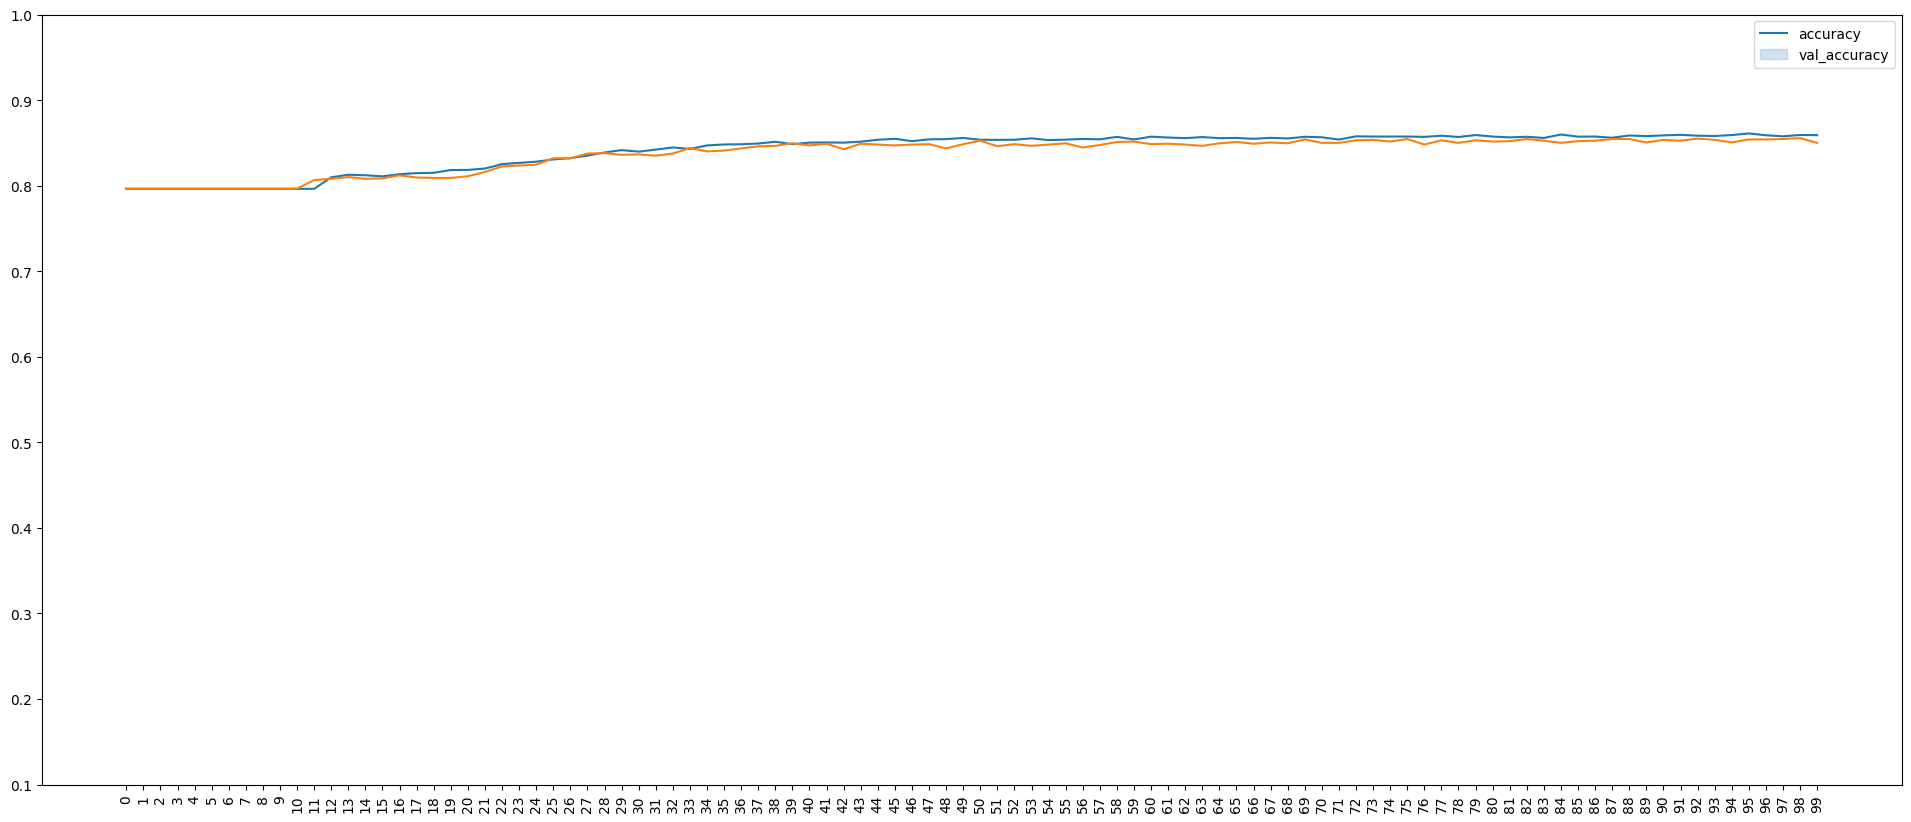

In [ ]:
visualizer(his_obj = history_object , parameter = "accuracy")

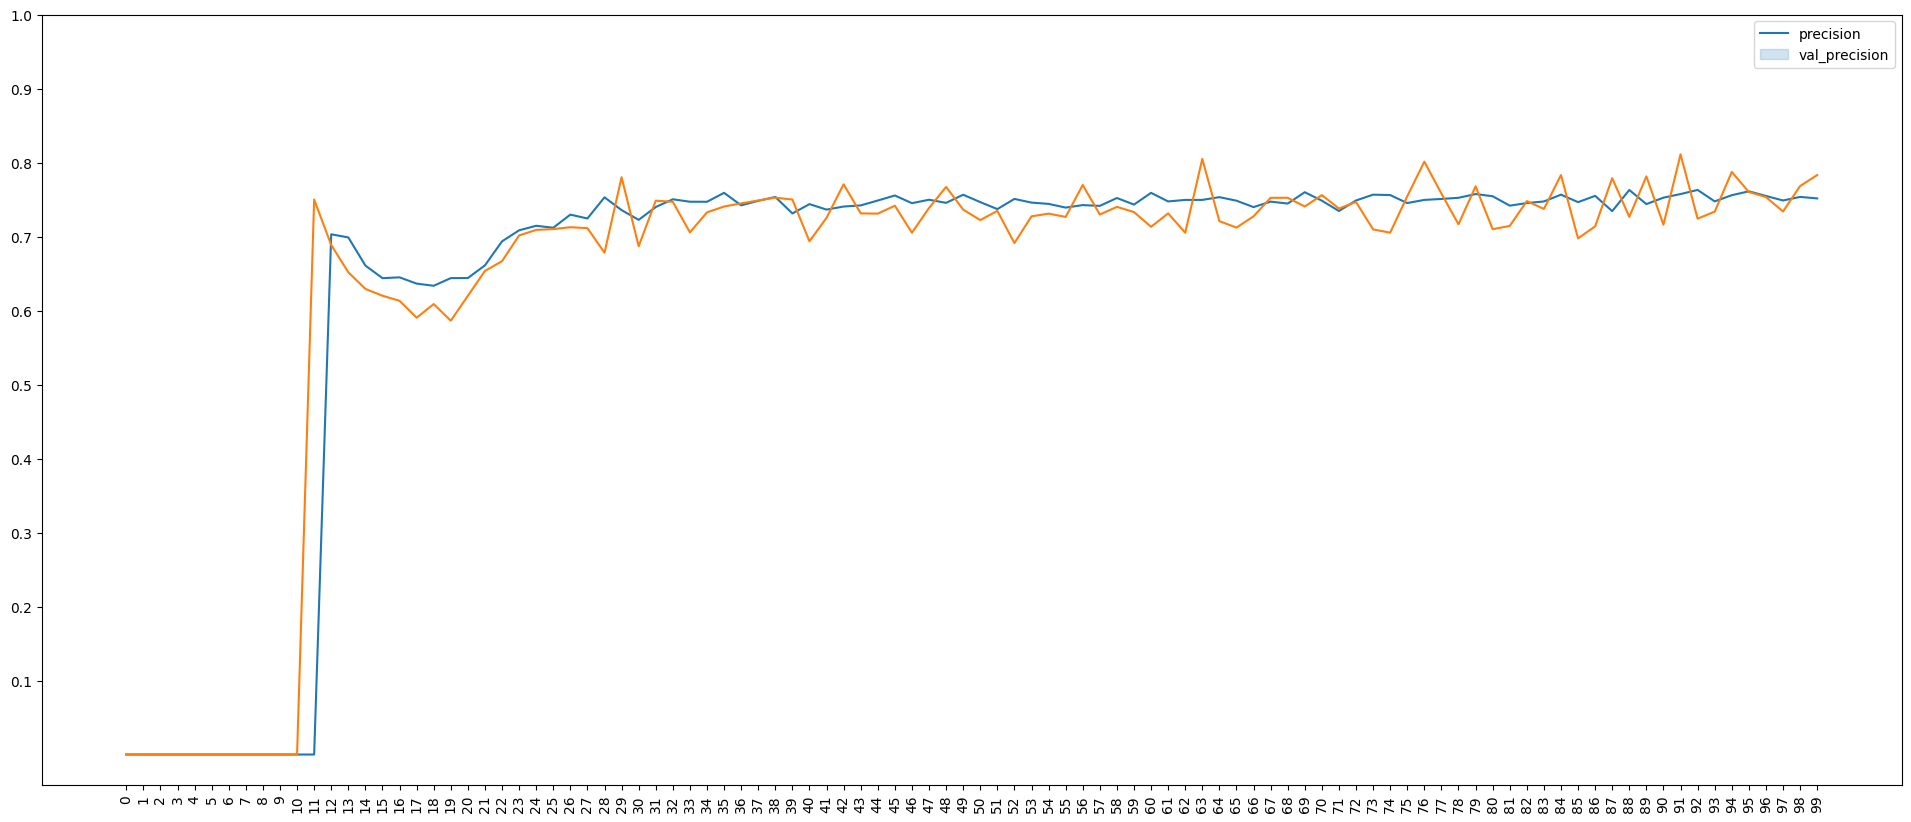

In [ ]:
visualizer(his_obj = history_object , parameter = "precision")

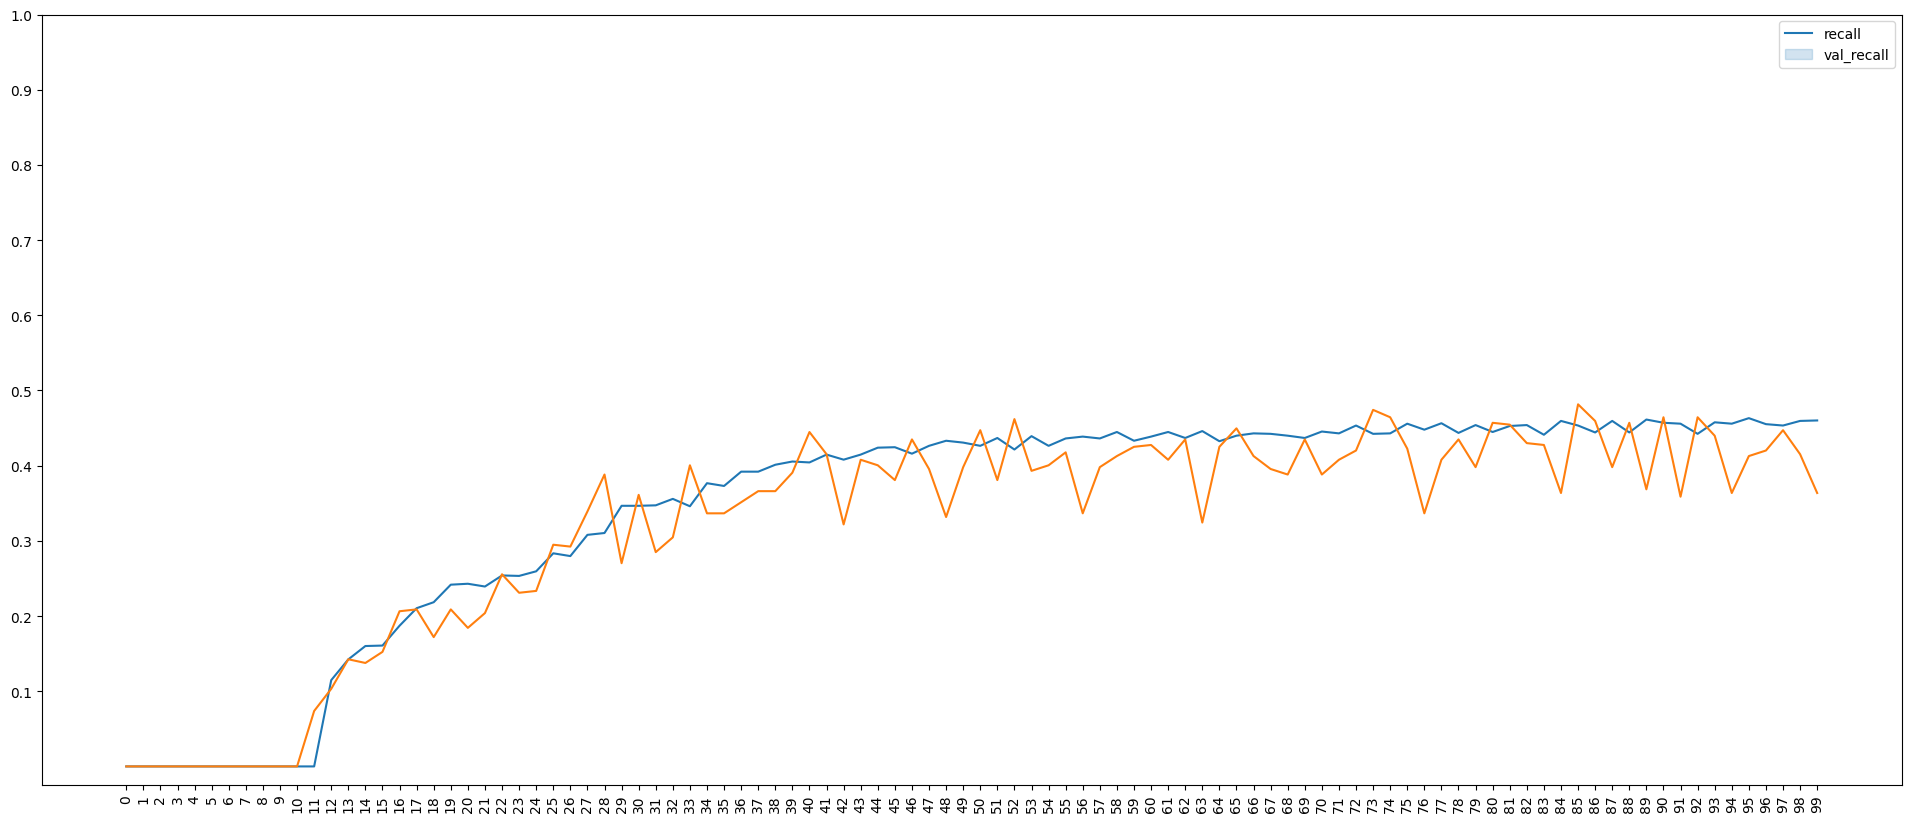

In [ ]:
visualizer(his_obj = history_object , parameter = "recall")